(42000, 785)
Numer of occurences per class in the training data


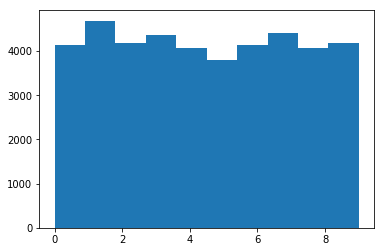

In [12]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
#matplotlib inline

#Train data
data = np.loadtxt('train.csv', delimiter=',')

x = data[:,1:]
y = data[:,0]

print (data.shape)
#Class Distribution
plt.hist(y);
print("Numer of occurences per class in the training data")
plt.show()


#Test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [41]:
#---------------------------------------------------------------------
#        LINEAR MODEL
#---------------------------------------------------------------------
linear = SVC(kernel='linear') #0.9070238095238096 #0.9113690476190476
linear.fit(x_train, y_train)
#Measure accuracy
y_predicted = linear.predict(x_test)
print(accuracy_score(y_test, y_predicted))

0.9076190476190477


In [3]:
#---------------------------------------------------------------------
#        DECISION TREE
#---------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_predicted = tree.predict(x_test)
accuracy_score(y_test, y_predicted) #0.8457738095238095

0.8427976190476191

In [8]:
#---------------------------------------------------------------------
#        K-NEAREST
#---------------------------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(7) # We set the number of neighbors to 15
knn.fit(x_train, y_train)

y_predicted = knn.predict(x_test)
print('accuracy ', accuracy_score(y_test, y_predicted))



x = [3,4,5,6,7,8,9,10]
y = [0.9638,0.9632, 0.9647,0.9644,0.9634,0.9619,0.9617,0.9605]
plt.plot(x, y)
print("Accuracy depending on k in k-nearest neighbours")
plt.show()

#RESULTS 0.4 validation
#20 nei 0.9504166666666667
#15 nei 0.9554166666666667
#10 nei 0.9605357142857143
#9 nei 0.9617261904761905
#8 nei 0.9619047619047619
#7 nei 0.963452380952381
#6 nei 0.9644047619047619
#5 nei 0.9647619047619047
#4 nei 0.9632738095238095
#3 nei 0.9638690476190476

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [6]:
#---------------------------------------------------------------------
#        SVM
#---------------------------------------------------------------------
clf = SVC(gamma=0.001, C=100)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.11119047619047619

In [18]:
import tensorflow as tf
from sklearn.decomposition import PCA

print (tf.__version__)

#---------------------------------------------------------------------
#        DEEP LEARNING USING DIMENSION REDUCTION  (Worksheet 4)
#---------------------------------------------------------------------

pca = PCA(n_components=60) # reduce to 60 dimensions
pca.fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

print(x_train.shape) 
print(x_test.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu',input_shape=(60,)),
  tf.keras.layers.Dense(10, activation='softmax') #10 one for each class// softmax means that we can interpret the output as class probabilities. 
  ,tf.keras.layers.Dropout(0.2),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=5, batch_size=32)
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=1/6)
model.evaluate(x_test, y_test)

2.0.0-alpha0
(25200, 60)
(16800, 60)
Train on 21000 samples, validate on 4200 samples
Epoch 1/5


InvalidArgumentError: Can not squeeze dim[1], expected a dimension of 1, got 10
	 [[{{node metrics_6/accuracy/Squeeze}}]] [Op:__inference_keras_scratch_graph_109692]

In [19]:
from keras.utils import to_categorical
data = np.loadtxt('train.csv', delimiter=',')

x = data[:,1:785]
#print(x[0:10])
y = data[:,0]
#print(y[0:10])

#Test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

y_train = to_categorical(y_train)
print(x_train.shape) 
print(x_test.shape)


(25200, 784)
(16800, 784)


In [20]:

#---------------------------------------------------------------------
#        DEEP LEARNING USING Tenso reshape a 28x28
#---------------------------------------------------------------------
#The way that keras and TensorFlow interpretes images is a Tensor with 3 dimensions height width and the chanels 
#(in our case 1 because is black and with images) for this we transfomate the original matrix (25200, 784) to (25200, 28, 28)
#Using the reshape function
#tensorboard tensorboard --logdir==training:logs/ --host=127.0.0.1

#The way that keras interpretes images is a Tensor with 3 dimensions height width and the chanels 
x_train2 = x_train.reshape(25200,28,28,1)
#x_train2 = x_train2[:, :, :, 3]

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout 25% of the nodes of the previous layer during training
model.add(Flatten())     # Flatten, and add a fully connected layer
model.add(Dense(128, activation='sigmoid')) 
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax')) # Last layer: 10 class nodes, softmax is the loss function used 

#---------------------------------------------------------------------
#        FULL SIGMOID ACTIVATION FUNCTION WITHOUT DROPOUT acc: 0.9989 val_acc: 0.9847
#---------------------------------------------------------------------

"""
#The way that keras interpretes images is a Tensor with 3 dimensions height width and the chanels 
x_train2 = x_train.reshape(25200,28,28,1)
#x_train2 = x_train2[:, :, :, 3]
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Dropout, Flatten

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout 25% of the nodes of the previous layer during training
model.add(Flatten())     # Flatten, and add a fully connected layer
model.add(Dense(128, activation='sigmoid')) 
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax')) # Last layer: 10 class nodes, softmax is the loss function used 

"""
#---------------------------------------------------------------------
#        SIGMOID + RELU ACTIVATION FUNCTION WITHOUT DROPOUT batches of 32 samples acc: 0.9911 val_acc: 0.9804
#---------------------------------------------------------------------

"""
#The way that keras interpretes images is a Tensor with 3 dimensions height width and the chanels 
x_train2 = x_train.reshape(25200,28,28,1)
#x_train2 = x_train2[:, :, :, 3]
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Dropout, Flatten

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0)) # Dropout 25% of the nodes of the previous layer during training
model.add(Flatten())     # Flatten, and add a fully connected layer
model.add(Dense(128, activation='sigmoid')) 
model.add(Dropout(0))
model.add(Dense(10, activation='softmax')) # Last layer: 10 class nodes, softmax is the loss function used 
"""

#---------------------------------------------------------------------
#        FULL SIGMOID accfunc WITHOUT DROPOUT acc: 0.9989 val_acc: 0.9847
#---------------------------------------------------------------------

"""
#SIGMOID ACTIVATION WITH DROPOUT 0.9730
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout 25% of the nodes of the previous layer during training
model.add(Flatten())     # Flatten, and add a fully connected layer
model.add(Dense(128, activation='sigmoid')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # Last layer: 10 class nodes, softmax is the loss function used 
"""
#---------------------------------------------------------------------
#        Standard
#---------------------------------------------------------------------

"""
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout 25% of the nodes of the previous layer during training
model.add(Flatten())     # Flatten, and add a fully connected layer
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # Last layer: 10 class nodes, with dropout
""" 


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
## print (y_train.shape)

#---------------------------------------------------------------------
#        Standard
#---------------------------------------------------------------------
from keras.optimizers import SGD, Adam
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(x_train2, y_train, epochs=10, batch_size=100, validation_split=1/4, callbacks=[tensorboard])

#---------------------------------------------------------------------
#        Nesterov optimacer
#---------------------------------------------------------------------
"""from keras.optimizers import SGD, Adam
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(x_train2, y_train, epochs=10, batch_size=100, validation_split=1/4)"""

In [98]:
test = np.loadtxt('test.csv', delimiter=',')
print (test.shape)
test_rs = test.reshape(28000,28,28,1)
test_rs2= test.reshape(28000,28,28)

(28000, 784)


In [46]:
def plot_digits(data):
    n=1
    plt.figure(figsize=(12, 12*n))
    for i in range(n):
        ax = plt.subplot(1,n, i+1)
        plt.imshow(data[i], cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

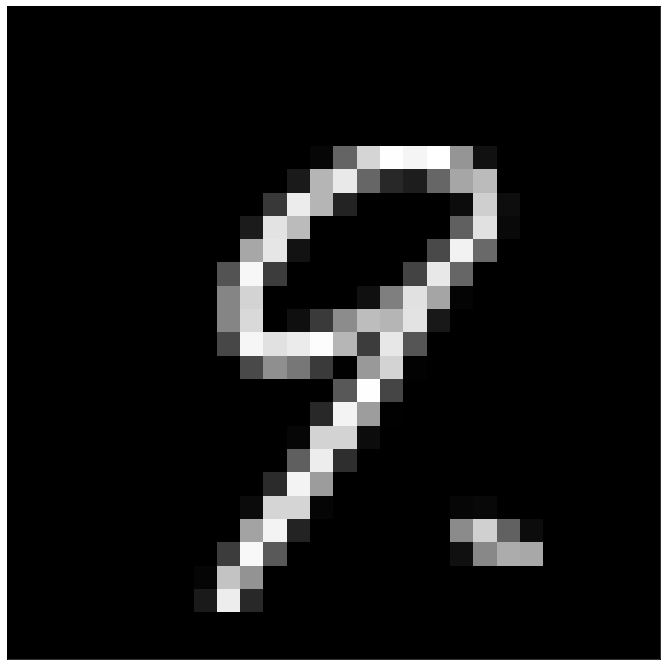

In [107]:
plot_digits(test_rs2[2:3, :, :])

In [108]:
import tensorflow as tf

for i,image in enumerate(test_rs): 
    predictions = model.predict(test_rs[i:i+1, :, :])
    s = np.argmax(predictions[0])
    print(s)
    
#print (classification)

2
0
9
9
3
7
0
3
0
3
5
7
4
0
4
3
3
1
9
0
9
1
1
5
7
4
2
7
4
7
7
5
4
2
6
2
5
5
1
6
7
7
4
9
8
7
8
2
6
7
6
8
8
3
8
2
1
2
2
0
4
1
7
0
0
0
1
9
0
1
6
5
8
8
2
8
9
9
2
3
5
4
1
0
9
2
4
3
6
7
2
0
6
6
1
4
3
9
7
4
0
9
2
0
7
3
0
5
0
8
0
0
4
7
1
7
1
1
3
3
3
7
2
8
6
3
8
7
8
4
3
5
6
0
0
0
3
1
3
0
4
3
4
5
5
8
7
7
2
8
4
3
5
6
5
3
7
5
7
8
3
0
4
5
1
2
7
6
3
0
2
7
8
6
1
3
7
4
1
2
4
8
5
2
4
9
2
1
6
0
6
1
4
9
6
0
9
7
6
9
1
9
0
9
9
0
8
4
6
2
0
9
3
6
3
2
1
6
3
4
2
3
1
2
2
0
4
6
1
0
0
4
9
1
7
3
2
3
8
6
8
6
2
8
5
5
9
8
3
5
9
7
1
3
8
4
5
1
4
5
6
3
3
5
7
0
6
8
3
1
6
0
6
3
9
9
1
5
8
4
0
9
2
0
5
3
7
8
9
9
5
7
7
9
9
6
3
0
3
3
6
9
8
2
6
3
7
1
4
5
8
5
9
0
0
3
8
4
1
8
4
1
1
9
8
4
5
1
5
3
6
3
1
3
0
9
0
0
6
0
6
3
1
8
6
0
6
5
2
2
6
7
7
2
5
8
3
9
2
7
8
6
3
8
4
2
3
8
1
6
4
8
7
9
7
6
9
5
3
7
6
5
5
4
2
6
2
1
3
7
1
7
9
9
6
1
1
1
7
3
9
7
6
1
1
1
9
3
8
5
5
0
4
1
2
3
1
1
3
5
9
6
6
5
3
1
4
7
4
7
4
8
5
2
6
1
3
9
5
0
8
4
7
4
4
4
1
5
3
9
9
7
6
9
5
9
2
3
5
6
6
7
5
0
5
1
7
4
4
1
1
4
9
5
6
0
1
3
1
0
4
8
1
2
7
9
4
8
3
7
7
4
2
4
2
7
6
3
2
0


3
9
1
0
4
2
9
3
5
9
5
5
2
5
0
8
0
4
2
4
3
8
7
9
4
0
1
4
9
4
4
3
2
0
8
4
1
0
9
3
2
4
6
9
0
6
1
1
7
4
7
8
7
5
7
0
1
8
4
2
5
4
8
9
1
0
2
8
7
8
4
4
7
6
9
4
1
7
8
8
3
4
2
4
7
8
7
8
7
4
9
4
7
3
6
9
1
5
1
0
1
8
1
6
4
3
3
6
5
5
8
1
9
2
3
7
9
9
2
9
8
3
4
5
1
4
9
6
1
3
5
6
9
6
5
3
5
4
5
0
2
6
8
9
9
9
6
6
7
5
8
2
0
9
5
0
1
9
7
2
3
3
0
4
9
3
1
3
9
0
3
8
4
9
4
6
8
9
6
9
0
8
6
5
0
4
8
6
0
0
9
1
4
2
5
6
3
8
8
8
8
2
4
2
7
6
4
7
8
6
9
8
6
3
5
4
3
9
9
3
0
8
2
9
1
6
9
1
0
1
8
7
6
5
5
4
1
7
3
9
1
1
2
3
9
0
7
2
2
4
1
7
7
7
8
3
5
1
6
2
1
0
8
7
2
5
1
1
8
6
3
6
6
9
8
1
7
4
9
1
6
7
8
0
7
6
1
6
8
1
3
9
0
7
5
3
2
7
0
8
1
4
0
8
7
0
6
5
1
7
0
1
6
6
1
4
8
6
8
9
5
1
0
2
2
0
7
8
3
5
1
8
3
7
6
9
8
4
9
1
0
3
3
5
9
2
7
6
3
3
8
0
0
9
7
5
5
0
3
0
7
2
1
0
7
1
5
7
0
2
5
4
2
6
1
3
1
1
3
6
6
8
4
2
3
0
1
4
4
1
8
8
9
7
6
2
5
1
9
2
5
9
1
4
3
9
4
6
9
8
5
0
8
4
7
0
0
8
0
4
7
0
2
2
7
9
6
9
5
6
1
1
1
4
8
7
9
6
2
2
2
8
5
7
1
1
1
2
9
1
8
1
3
2
1
0
6
4
7
6
5
9
1
2
8
8
4
4
3
7
1
7
9
2
8
8
6
1
3
4
5
6
8
7
0
0
1
5
4
5
5
7
3
2
0
9
9
4
9
5


2
1
2
3
9
4
1
9
2
8
4
6
7
8
6
9
8
4
5
1
2
0
2
9
5
1
5
0
8
5
2
7
5
8
1
5
1
1
0
5
4
2
0
0
9
0
2
7
7
5
2
5
4
6
3
9
5
4
0
5
6
3
2
3
1
6
2
4
4
4
0
5
1
8
0
3
4
5
0
2
2
0
1
1
6
1
4
3
1
5
9
9
2
5
0
0
2
4
7
8
2
8
4
4
4
4
8
0
5
8
5
4
7
4
4
9
2
4
8
3
0
9
8
7
6
2
4
2
6
3
2
7
5
1
0
2
9
9
0
4
2
7
0
5
4
4
1
5
2
6
8
1
2
8
3
3
2
9
7
1
4
4
6
9
0
2
4
4
5
7
8
9
4
3
4
1
7
8
2
8
2
1
2
9
7
7
0
1
2
0
9
4
2
1
4
5
0
8
6
1
9
5
1
6
2
1
8
0
5
1
9
9
6
6
5
1
1
7
9
4
2
7
3
4
6
0
6
3
0
6
3
0
1
3
2
6
3
1
0
5
9
1
3
9
0
2
0
5
8
9
6
6
5
2
4
7
2
0
7
9
1
3
9
9
2
6
4
9
7
6
0
0
4
8
4
9
8
3
5
1
7
7
1
4
1
6
3
9
7
6
6
1
9
4
0
0
4
4
8
3
1
7
5
7
3
7
4
1
0
3
2
4
3
2
2
6
0
9
9
2
3
1
8
6
4
2
2
1
7
3
1
4
5
0
6
8
1
7
8
3
7
6
7
7
3
7
2
4
5
7
7
9
0
9
1
8
1
8
4
4
1
9
9
6
1
7
5
3
5
3
7
8
0
0
1
0
3
6
6
1
9
4
0
1
0
2
0
6
7
7
5
3
1
8
9
9
0
4
6
2
5
0
6
5
6
8
3
4
1
8
4
6
8
7
1
8
6
8
1
2
3
3
2
3
3
6
8
2
7
6
8
8
0
9
2
7
7
5
3
1
2
3
1
4
3
6
4
8
3
1
3
6
9
6
9
0
3
9
0
7
7
3
0
0
9
3
5
7
9
8
6
0
7
7
2
8
7
9
1
2
3
6
0
7
8
1
0
3
6
9
9
5
0
5
0
1
1
8
2
5


1
4
6
5
1
1
7
3
8
3
8
8
1
9
8
1
6
8
4
2
2
8
3
3
4
5
2
7
0
3
9
5
4
7
4
8
0
7
9
3
1
8
4
8
0
3
7
0
4
5
3
8
0
5
1
3
6
9
6
5
4
7
1
5
6
5
2
1
0
6
2
2
9
9
1
6
3
3
3
7
2
9
8
5
0
1
6
6
0
1
1
8
7
4
4
9
9
0
8
8
6
7
1
4
3
6
8
8
1
1
6
9
8
1
1
1
6
1
6
9
3
3
0
5
7
7
5
7
5
5
2
0
0
1
3
4
8
8
8
7
7
2
8
6
4
9
4
8
0
6
6
9
5
1
0
6
1
6
7
1
3
2
4
0
7
9
3
4
4
3
2
5
0
4
5
5
6
8
5
6
4
4
8
6
0
9
4
1
7
3
1
7
9
9
9
2
8
0
5
1
4
3
2
4
3
1
5
8
1
4
4
1
7
7
5
6
3
2
0
3
9
1
9
4
5
1
3
9
9
4
3
2
8
1
8
6
4
1
9
0
2
0
9
0
6
1
5
0
8
0
9
3
8
1
8
7
1
8
6
6
4
0
8
6
3
7
9
2
2
5
1
4
3
3
6
9
1
0
7
2
5
9
7
5
1
9
9
3
4
3
3
8
8
7
0
8
3
7
2
1
8
6
1
7
7
9
1
0
6
5
0
2
3
9
1
7
0
8
6
2
4
9
5
7
2
9
2
3
8
2
1
7
5
1
4
5
1
8
1
7
4
4
1
3
7
0
5
2
9
2
6
5
1
1
5
1
8
4
2
5
5
8
7
6
4
0
7
9
8
6
0
8
2
4
8
2
6
4
2
2
8
8
3
9
9
1
4
0
2
1
0
0
0
9
2
3
8
3
1
9
3
0
2
8
6
0
2
7
4
5
6
2
8
4
3
0
0
0
7
7
8
4
8
6
4
2
1
2
0
6
7
4
3
5
2
0
0
4
4
9
8
5
1
4
1
2
1
5
4
9
9
5
1
8
1
5
7
4
5
6
7
6
3
8
3
4
2
3
6
3
6
8
3
4
2
4
0
1
9
1
7
7
2
7
2
4
1
0
4
6
2
5
6
0
3
1
4
1
2
1


2
1
4
2
4
5
1
8
6
8
7
6
2
6
9
8
9
7
4
1
4
6
2
4
5
8
8
9
7
6
3
9
8
6
3
0
0
9
6
4
2
5
4
3
5
2
0
5
7
3
9
5
5
0
0
4
5
1
9
1
1
1
4
8
6
4
4
3
0
8
5
1
4
2
4
0
1
0
3
9
0
8
8
7
0
8
8
8
6
8
5
6
6
5
9
4
6
4
2
1
5
5
2
7
0
1
0
0
9
3
2
1
6
5
7
7
5
5
2
8
3
3
2
5
8
3
3
9
9
6
4
6
2
0
4
3
6
7
5
3
2
7
7
5
6
2
3
3
6
4
6
1
3
1
7
8
2
6
6
4
4
8
6
7
5
8
5
2
8
9
8
0
9
2
9
3
2
4
0
6
6
2
4
7
8
1
3
8
1
2
7
1
8
7
9
9
4
9
4
3
7
1
2
6
8
5
1
2
1
1
0
1
6
5
2
6
2
2
3
6
9
7
4
9
0
1
1
1
1
3
5
1
1
2
3
1
2
6
1
4
0
8
0
2
1
4
4
5
7
0
8
7
8
1
3
7
2
2
2
4
2
9
2
9
1
8
2
2
5
9
4
3
7
1
0
4
4
2
9
2
0
0
5
0
1
6
0
2
7
5
0
7
4
9
9
3
6
2
4
1
3
2
3
0
0
6
5
8
7
0
6
2
0
9
9
1
5
3
5
8
9
2
7
1
5
0
1
0
0
6
4
7
7
4
9
3
8
8
9
6
7
0
0
3
3
8
7
7
4
2
1
5
7
1
7
8
2
8
0
8
3
1
0
1
5
5
6
6
6
6
1
0
8
3
7
0
5
9
6
0
2
2
5
6
1
7
5
1
7
8
1
0
4
4
3
0
2
1
3
8
3
5
7
2
8
2
9
0
3
4
5
6
7
3
8
5
2
3
3
8
8
4
4
8
8
3
9
6
1
1
6
6
4
4
5
3
2
4
2
5
9
6
8
8
5
9
5
3
0
9
2
6
3
9
3
9
6
8
9
8
3
7
2
7
7
7
4
6
7
4
6
1
8
7
9
5
8
1
2
9
3
1
8
5
1
5
1
1
8
5
8
2
2
9
2
7
5
3
6
8


2
9
5
4
2
3
2
8
0
0
7
7
3
3
5
8
2
7
8
9
5
1
1
3
6
1
2
3
5
2
2
1
3
7
3
7
5
6
9
7
4
9
0
8
8
6
7
1
5
7
4
9
0
9
3
6
1
7
2
4
3
3
9
7
3
6
0
0
1
3
0
5
2
8
9
7
5
2
5
8
0
9
7
6
7
6
2
3
3
7
7
3
2
0
3
4
6
8
2
3
1
1
6
9
3
1
8
1
8
3
0
6
3
2
4
3
9
2
0
9
5
9
5
2
7
5
8
0
3
1
9
1
0
1
9
5
9
2
2
2
1
5
9
2
2
6
8
3
9
1
9
1
0
3
2
9
7
4
4
2
2
6
1
1
9
1
5
2
8
3
0
5
6
8
3
6
2
7
9
0
8
5
7
4
6
9
8
3
7
5
2
7
6
6
7
7
8
6
2
5
8
9
8
8
7
3
5
2
8
8
8
0
6
6
0
0
0
1
0
6
3
4
2
0
6
2
0
9
8
1
6
7
5
1
9
8
8
9
0
8
1
2
4
8
5
1
5
3
6
1
4
2
6
7
5
5
4
2
7
5
5
2
9
3
1
9
5
6
1
7
1
3
4
6
7
9
7
1
3
0
1
8
5
2
1
1
9
4
9
3
4
1
5
3
0
1
0
6
7
3
7
5
0
7
7
7
7
1
4
9
6
9
9
5
7
1
8
8
9
4
1
6
7
3
4
4
8
3
2
7
4
9
1
9
0
4
8
6
3
5
3
7
1
5
7
9
7
0
3
1
7
2
7
0
1
5
2
6
7
5
7
9
6
7
2
8
2
9
6
6
5
9
7
8
2
4
9
5
4
4
9
6
7
1
8
6
0
3
2
7
5
9
5
2
3
5
5
7
9
7
9
2
2
8
5
2
7
5
0
1
1
8
0
8
5
6
3
0
8
4
9
6
4
1
0
9
3
3
4
2
8
1
1
6
5
1
2
7
8
6
2
8
7
8
9
7
7
0
2
3
0
8
9
8
4
4
3
9
7
7
9
3
3
3
3
8
0
6
2
7
7
2
5
2
7
8
0
5
3
4
4
3
2
5
2
0
9
7
2
6
1
0
4
5
3
2
7
4
4
4


8
3
3
2
3
6
3
8
5
5
2
5
2
4
2
9
3
9
9
2
6
9
6
0
0
9
0
8
2
1
7
6
2
0
1
6
2
3
8
9
1
2
5
8
2
0
7
7
1
1
0
8
6
7
4
4
7
3
2
0
9
4
2
7
7
1
3
4
1
3
6
3
6
6
9
5
2
4
5
1
3
6
4
6
2
0
2
7
1
9
8
2
4
6
6
3
6
8
2
8
6
1
8
7
3
6
6
5
7
0
2
1
3
4
9
4
3
9
2
7
3
3
2
0
3
3
9
0
4
0
6
9
5
3
4
4
5
0
1
5
0
4
2
3
4
0
1
0
5
8
4
0
3
5
8
6
9
4
4
7
4
3
5
0
9
2
3
6
9
8
2
5
8
7
0
2
2
5
6
7
2
2
5
1
8
5
7
2
2
7
3
7
7
6
6
4
4
1
5
8
9
0
8
8
2
3
6
2
9
8
0
2
0
5
4
8
7
4
6
6
2
9
2
2
6
2
4
0
7
6
2
1
2
6
4
4
5
2
6
9
9
6
2
4
9
8
2
4
9
6
7
8
1
0
9
8
6
4
3
8
4
7
5
1
9
1
4
3
0
4
8
0
9
0
0
3
2
7
1
4
2
8
4
7
8
4
3
1
0
3
2
4
2
2
7
9
4
1
4
2
3
9
9
2
9
1
6
6
9
6
1
4
0
9
9
3
9
6
8
4
0
7
0
0
2
8
9
1
1
3
7
0
6
7
7
0
0
6
0
3
9
5
4
6
1
7
6
3
9
8
7
8
0
4
3
8
0
1
0
7
3
0
6
2
8
2
8
4
9
6
3
4
3
9
7
1
3
2
6
2
5
5
2
9
6
8
6
7
0
8
9
4
0
2
1
5
1
6
8
1
0
2
5
2
9
8
5
3
6
8
7
2
1
8
3
2
0
4
8
0
9
5
0
2
6
0
2
6
3
3
6
2
8
1
2
6
8
1
2
5
5
4
0
0
1
8
2
0
7
9
9
2
0
4
7
0
6
0
3
1
8
2
2
6
2
7
6
0
0
5
1
6
3
7
8
1
5
5
2
0
6
4
5
8
3
7
7
1
5
8
1
8
3
3
6
8
5
0
9
8
